In [1]:
!pip install tensorflow==2.15.0
!pip install tensorflow-probability==0.23.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
import shutil
import zipfile

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

from google.colab import drive

# Mount google drive in colab
drive.mount('/content/gdrive/', force_remount=True)

# Unzip dataset file in colab
kaggle_dir = '/content/gdrive/MyDrive/Kaggle/'

filename = 'isic-2024-challenge.zip'

with zipfile.ZipFile(f'{kaggle_dir}/{filename}', 'r') as zp:
  zp.extractall('Kaggle-ISIC-Challenge/dataset/')

Mounted at /content/gdrive/


In [3]:
train_csv = f'Kaggle-ISIC-Challenge/dataset/train-metadata.csv'
train_df = pd.read_csv(train_csv)

columns = train_df.columns

print(f'Columns: {columns}')

# TODO: Add all variables
# Continous columns- starting analysis on a subset of columns for now
continous = ['age_approx',
 'tbp_lv_C',
 'clin_size_long_diam_mm',
 'tbp_lv_A',
 'tbp_lv_Aext',
 'tbp_lv_B',
 'tbp_lv_Bext',
 'tbp_lv_C',
 'tbp_lv_Cext',
 'tbp_lv_H',
 'tbp_lv_Hext',
'tbp_lv_L',
'tbp_lv_Lext',
'tbp_lv_areaMM2',
'tbp_lv_area_perim_ratio',
'tbp_lv_color_std_mean',
'tbp_lv_deltaA',
'tbp_lv_deltaB',
'tbp_lv_deltaL',
'tbp_lv_deltaLB',
'tbp_lv_deltaLBnorm',
'tbp_lv_eccentricity',]

# Categorical columns
categorical = ['anatom_site_general',
 'tbp_tile_type',
 'image_type',
 'tbp_lv_location',
 'tbp_lv_location_simple']

continous_vars = train_df[continous]
categorical_vars = train_df[categorical]

continous_vars['target'] = train_df['target']
continous_vars['id'] = train_df['isic_id']


<ipython-input-3-a3300a721e99>:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_csv)


Columns: Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_

<ipython-input-3-a3300a721e99>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_vars['target'] = train_df['target']
<ipython-input-3-a3300a721e99>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_vars['id'] = train_df['isic_id']


In [4]:
from sklearn.model_selection import train_test_split

train_df = continous_vars.copy()
# Normalize columns
for col in continous:
  train_df[col] = (train_df[col] - train_df[col].min()) / (train_df[col].max() - train_df[col].min())

# Get NaN value counts age_approx : 2798
#nan_counts = continous_vars.isna().sum()
mean_age = train_df['age_approx'].mean()
train_df['age_approx'].fillna(mean_age, inplace=True)

# Split dataset
train, test = train_test_split(train_df, test_size=0.2, random_state=42)

print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (320847, 24)
Test shape: (80212, 24)


In [5]:
print('Initial:', train['target'].value_counts())

def undersample_data(df, divisor = 5):
  # Undersample class 0 by 1/5 times
  cls_indices = [idx for idx, cls in enumerate(df['target'].values) if cls == 0]
  cls_1 = [idx for idx, cls in enumerate(df['target'].values) if cls == 1]
  to_keep = len(cls_indices)//5
  np.random.shuffle(cls_indices)
  indices_to_keep = cls_indices[:to_keep]
  all_indices = indices_to_keep + cls_1

  np.random.shuffle(all_indices)
  df = df.iloc[all_indices]
  return df

train = undersample_data(train)
test = undersample_data(test)

print('Final', train['target'].value_counts())

Initial: target
0    320528
1       319
Name: count, dtype: int64
Final target
0    64105
1      319
Name: count, dtype: int64


In [40]:
import tensorflow as tf
from PIL import Image
class DataGenerator_v2(tf.keras.utils.Sequence):
  def __init__(self, image_ids, df, labels, batch_size=16):

    self.image_ids = image_ids
    self.df = df
    self.labels = labels
    self.batch_size = batch_size

    self.IMAGE_SIZE = 224
    self.image_dir = 'Kaggle-ISIC-Challenge/dataset/train-image/image'

  def __len__(self):
    return int(np.ceil(len(self.df) / self.batch_size))

  def __getitem__(self, index):

    batch_df = self.df[index * self.batch_size : (index + 1) * self.batch_size]

    # Image features
    batch_ids = self.image_ids[index * self.batch_size : (index + 1) * self.batch_size]

    batch_images = []
    image_features = []
    for id in batch_ids:
      q = Image.open(f'{self.image_dir}/{id}.jpg')
      q = np.array(q.resize((self.IMAGE_SIZE, self.IMAGE_SIZE)))
      batch_images.append(q)

    length = len(batch_images)
    numerical_features = batch_df.to_numpy()

    # Batch labels
    batch_y = self.labels[index*self.batch_size : (index+1)*self.batch_size]

    return np.array(batch_images).reshape(length, 224, 224, 3), np.asarray(batch_y)

In [41]:
dtype= 'float32'
train_labels = train['target'].values
train_image_ids = train['id'].values
train_input = train.drop(['target', 'id'], axis = 1)

train_data_gen = DataGenerator_v2(train_image_ids, train_input, train_labels, 8)

test_labels = test['target'].values
test_image_ids = test['id'].values
test_input = test.drop(['target', 'id'], axis = 1)

val_data_gen = DataGenerator_v2(test_image_ids, test_input, test_labels,  8)

In [42]:
x, y = train_data_gen.__getitem__(0)
print(x.shape)
print(y.shape)

(8, 224, 224, 3)
(8,)


Shape of X : (8, 224, 224, 3)
Shape of y: (8,) int64
(8, 224, 224, 3)


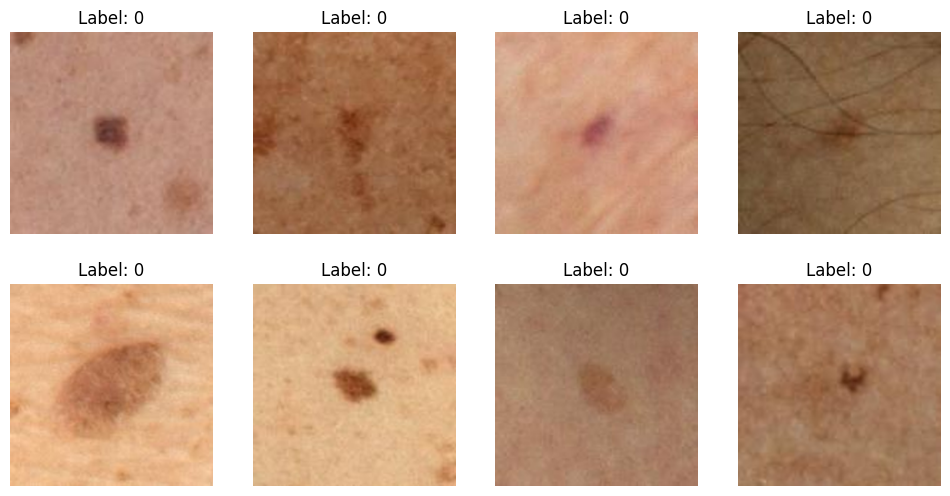

In [27]:
#check Train Dataloader for each batch
for x, y in val_data_gen:
  print(f"Shape of X : {x.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  print(x.shape)
  fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 2 rows, 4 columns
  for i in range(x.shape[0]):
      row = i // 4
      col = i % 4
      axes[row, col].imshow(x[i])
      axes[row, col].axis('off')  # Hide axes
      axes[row, col].set_title(f'Label: {y[i]}')
  break
  plt.show()

In [36]:
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers

examples = int(train.shape[0])

kl_divergence = (lambda q, p, _: tfd.kl_divergence(q, p) / tf.cast(tf.shape(q.sample())[0], tf.float32))

divergence_fn = lambda q, p, _: tfd.kl_divergence(q, p) / examples

# For Reparameterization Layers
def custom_normal_prior(dtype, shape, name, trainable, add_variable_fn):
    distribution = tfd.Normal(loc = 0.1 * tf.ones(shape, dtype),
                              scale = 1.5 * tf.ones(shape, dtype))
    batch_ndims = tf.size(distribution.batch_shape_tensor())

    distribution = tfd.Independent(distribution,
                                   reinterpreted_batch_ndims = batch_ndims)
    return distribution

def laplace_prior(dtype, shape, name, trainable, add_variable_fn):
    distribution = tfd.Laplace(loc = tf.zeros(shape, dtype),
                               scale = tf.ones(shape, dtype))
    batch_ndims = tf.size(distribution.batch_shape_tensor())

    distribution = tfd.Independent(distribution,
                                   reinterpreted_batch_ndims = batch_ndims)
    return distribution

def conv_reparameterization_layer(filters, kernel_size, activation):
    # For simplicity, we use default prior and posterior.
    # In the next parts, we will use custom mixture prior and posteriors.
    return tfpl.Convolution2DReparameterization(
            filters = filters,
            kernel_size = kernel_size,
            activation = activation,
            padding = 'same',
            kernel_posterior_fn = tfpl.default_mean_field_normal_fn(is_singular=False),
            kernel_prior_fn = tfpl.default_multivariate_normal_fn,

            bias_prior_fn = tfpl.default_multivariate_normal_fn,
            bias_posterior_fn = tfpl.default_mean_field_normal_fn(is_singular=False),

            kernel_divergence_fn = divergence_fn,
            bias_divergence_fn = divergence_fn)


In [43]:
#import tf_keras
bayesian_cnn = tf.keras.Sequential([
    tfp.layers.Convolution2DReparameterization(
        16, kernel_size=5, padding='SAME', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D([2, 2]),

    tfp.layers.Convolution2DReparameterization(
        32, kernel_size=5, padding='SAME', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2),

    tfp.layers.Convolution2DReparameterization(
        64, kernel_size=5, padding='SAME', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2),

    tfp.layers.Convolution2DReparameterization(
        128, kernel_size=5, padding='SAME', activation=tf.nn.relu),
    tf.keras.layers.GlobalMaxPooling2D(),

    tfpl.DenseReparameterization(
        units = 1, activation = 'sigmoid',
        kernel_posterior_fn = tfpl.default_mean_field_normal_fn(is_singular=False),
        kernel_prior_fn = tfpl.default_multivariate_normal_fn,

        bias_prior_fn = tfpl.default_multivariate_normal_fn,
        bias_posterior_fn = tfpl.default_mean_field_normal_fn(is_singular=False),

        kernel_divergence_fn = divergence_fn,
        bias_divergence_fn = divergence_fn),

    tfp.layers.DistributionLambda(lambda t: tfd.Bernoulli(logits = t))
])

bayesian_cnn.build(x.shape)

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


In [44]:
def nll(y_true, y_pred):
  nll = -y_pred.log_prob(y_true)
  return nll

bayesian_cnn.compile(loss=nll,
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

bayesian_cnn.fit(train_data_gen, validation_data=val_data_gen, epochs = 50, steps_per_epoch = 250)

Epoch 1/50
250/250 [==============================] - 217s 857ms/step - loss: 679743.5625 - accuracy: 0.4675 - val_loss: 676235.8750 - val_accuracy: 0.4842
Epoch 2/50
250/250 [==============================] - 212s 852ms/step - loss: 672831.6250 - accuracy: 0.5220 - val_loss: 669401.6250 - val_accuracy: 0.5014
Epoch 3/50
250/250 [==============================] - 213s 854ms/step - loss: 666037.4375 - accuracy: 0.5030 - val_loss: 662655.9375 - val_accuracy: 0.4977
Epoch 4/50
250/250 [==============================] - 212s 851ms/step - loss: 659321.5000 - accuracy: 0.4920 - val_loss: 655987.1250 - val_accuracy: 0.4936
Epoch 5/50
250/250 [==============================] - 211s 848ms/step - loss: 652661.1250 - accuracy: 0.5165 - val_loss: 649340.9375 - val_accuracy: 0.5003
Epoch 6/50
250/250 [==============================] - 213s 853ms/step - loss: 646040.7500 - accuracy: 0.4795 - val_loss: 642730.3750 - val_accuracy: 0.4951
Epoch 7/50
250/250 [==============================] - 215s 861ms